In [1]:
# Check NVIDIA GPU status
!nvidia-smi


Mon Dec 23 09:32:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive

# Mount Google Drive to /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Set Up the Environment


In [3]:
# Install necessary libraries
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 14.8 MB/s eta 0:00:00


In [4]:
!pip install roboflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Download Roboflow project

DO NOT SHARE API KEY

Dataset Link: https://universe.roboflow.com/iliescu-mihail-doirn/stanford-dogs-dataset-dog-breed/dataset/1


In [5]:

# USE ROBIFLOW PROJECT FOR YOLOv11
 # ENTER YOUR API KEY

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOR_API_KEY")
project = rf.workspace("iliescu-mihail-doirn").project("stanford-dogs-dataset-dog-breed")
version = project.version(1)
dataset = version.download("yolov11")



# 874 Total Images
# Dataset Split Train Set: :: 14338 Images
#                Valid Set::: 3086 Images
#                 Test Set:%:: 3067 Images

# Preprocessing
# Auto-Orient: Applied
# Resize: Stretch to 640x640
# Augmentations
# No augmentations were applied.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stanford-Dogs-Dataset-dog-breed-1 in yolov11:: 100%|██████████| 40994/40994 [00:06<00:00, 6280.74it/s]


Read https://docs.ultralytics.com/modes/ to know about modes

and also

Read https://docs.ultralytics.com/models/ to know about various models

We use Yolov11 so check for details at https://docs.ultralytics.com/models/yolo11/

and also

Read https://docs.ultralytics.com/modes/train/ to know about how to train and training parameters

Now copy code https://docs.ultralytics.com/tasks/detect/#how-do-i-train-a-yolo11-model-on-my-custom-dataset

Check the directory at /content/ and see that the dataset directory should be downlaoded and ready to use

Then modify the data.yaml from /content/Stanford-Dogs-Dataset-dog-breed-1/valid directory

Select path of imgaes directory from each of train, valid and test directories to the data.yaml files in respective positions

In [6]:
# copy code from https://docs.ultralytics.com/tasks/detect/#faq

# Check the directory at /content/ and see that the dataset directory is already prepared

from ultralytics import YOLO

# Load a pretrained model (largest model) in "/content/" directory i.e. local folder
model = YOLO("yolo11n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 14.4MB/s]


After traning is complete. Go to /content/runs/detect/train/weights and find the best.pt weight file. Download it and use it as a finetuned weight file for detecting objects.

Also various curves, results, plots are available here in /content/runs/detect/train

Now start prediction with our own finetuned model.

Go to https://docs.ultralytics.com/modes/predict/#key-features-of-predict-mode to know how rpediction takes place.

Repalce the pretrained YOLO11n.pt with /content/runs/detect/train/weights/best.pt

In [7]:
#### Modiy data.yaml as per train, valid and test directory locations

from ultralytics import YOLO
import os

print("torch.cuda.is_available():", __import__('torch').cuda.is_available())
print("torch.cuda.device_count():", __import__('torch').cuda.device_count())

device_to_use = 0 if __import__('torch').cuda.is_available() else 'cpu'

model = YOLO("/content/yolo11n.pt")  # Pretrained large model

results = model.train(data="/content/Stanford-Dogs-Dataset-dog-breed-1/data.yaml", epochs=100, imgsz=640)


torch.cuda.is_available(): True
torch.cuda.device_count(): 1
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/Stanford-Dogs-Dataset-dog-breed-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

100%|██████████| 755k/755k [00:00<00:00, 3.77MB/s]


Overriding model.yaml nc=80 with nc=120

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralyti

train: Scanning /content/Stanford-Dogs-Dataset-dog-breed-1/train/labels... 14338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14338/14338 [00:11<00:00, 1265.81it/s]


train: New cache created: /content/Stanford-Dogs-Dataset-dog-breed-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Stanford-Dogs-Dataset-dog-breed-1/valid/labels... 3086 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3086/3086 [00:02<00:00, 1218.32it/s]


val: New cache created: /content/Stanford-Dogs-Dataset-dog-breed-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.87G     0.7396      4.785      1.338          4        640: 100%|██████████| 897/897 [02:50<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:21<00:00,  4.55it/s]


                   all       3086       3328    0.00777      0.704     0.0137     0.0104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.86G     0.8696      4.101      1.418          9        640: 100%|██████████| 897/897 [02:46<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.65it/s]


                   all       3086       3328      0.186      0.129     0.0499     0.0344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.85G     0.9533      3.713       1.46          2        640: 100%|██████████| 897/897 [02:44<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.64it/s]


                   all       3086       3328      0.222      0.131     0.0542     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.86G     0.9893       3.55      1.482          2        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.66it/s]


                   all       3086       3328      0.222      0.217      0.106       0.07

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.86G     0.9387      3.242      1.434          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.73it/s]


                   all       3086       3328      0.209      0.319      0.171      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.85G      0.908      2.988      1.405          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.72it/s]


                   all       3086       3328      0.223      0.339      0.198      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.85G     0.8788      2.821      1.378          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.68it/s]


                   all       3086       3328      0.266      0.349      0.229      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.86G     0.8568        2.7      1.364          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.76it/s]


                   all       3086       3328      0.244      0.365      0.255      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.85G     0.8446      2.604      1.357          2        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.74it/s]


                   all       3086       3328        0.3      0.412      0.314      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.85G     0.8278      2.515      1.339          2        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.75it/s]


                   all       3086       3328      0.363      0.468       0.38      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.84G     0.8153       2.45      1.332          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.77it/s]


                   all       3086       3328      0.331      0.464       0.36      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.85G     0.8067      2.397      1.327          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.78it/s]


                   all       3086       3328      0.358      0.488      0.415      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.85G     0.8007      2.346      1.317          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.76it/s]


                   all       3086       3328      0.375      0.498      0.429       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.85G     0.7899      2.299      1.308          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.79it/s]


                   all       3086       3328      0.403      0.517      0.449      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.84G     0.7795      2.252      1.303          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.79it/s]


                   all       3086       3328      0.431      0.503      0.472      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.85G     0.7802      2.219      1.305          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.77it/s]


                   all       3086       3328      0.437      0.548      0.499      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.85G     0.7718      2.183      1.295          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.77it/s]


                   all       3086       3328      0.434      0.544      0.504      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.85G     0.7652      2.152      1.291          2        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.483      0.544      0.527      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.84G     0.7615      2.121      1.288          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.499      0.552      0.546      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.85G     0.7472      2.084      1.277          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.506      0.558      0.556      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.85G     0.7486      2.066      1.281          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.79it/s]


                   all       3086       3328      0.519      0.573       0.58       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.85G     0.7489      2.049      1.278          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.532      0.582      0.588      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.84G     0.7357      2.021      1.273          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.551      0.591      0.605      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.85G      0.738      2.003       1.27          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.551      0.603      0.625      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.85G      0.734      1.964      1.268          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.554      0.621      0.629       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.85G     0.7284       1.96      1.262          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.548      0.624       0.63      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.84G     0.7281       1.93      1.265          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.582      0.625      0.648      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.85G     0.7205      1.903      1.257          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.79it/s]


                   all       3086       3328      0.567      0.646      0.656      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.85G     0.7147      1.899      1.254          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328       0.58      0.651      0.663      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.85G     0.7112      1.882       1.25          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.612       0.64      0.675      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.84G     0.7071      1.854      1.247          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.85it/s]


                   all       3086       3328      0.628      0.651      0.678      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.85G     0.7122       1.85       1.25          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.624      0.649       0.69       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.85G     0.7161      1.825      1.256          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.612      0.675      0.697      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.85G     0.6999      1.822      1.244          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.634       0.67      0.707      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.84G     0.6991      1.801      1.244          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.648      0.663      0.707      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.85G     0.6959      1.775       1.24          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.648      0.669       0.71      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.85G     0.6991      1.762      1.241          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.656       0.68      0.723      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.85G     0.6929      1.768      1.239          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.653      0.684      0.719       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.84G     0.6984      1.751       1.24          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.653      0.702       0.73       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.85G     0.6844      1.724      1.234          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.85it/s]


                   all       3086       3328      0.657       0.69      0.736      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.85G     0.6886      1.723      1.233          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.669      0.689      0.737      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.85G     0.6738      1.712      1.226          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.662      0.706      0.742      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.84G     0.6851      1.687      1.232          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328        0.7       0.69      0.749       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.85G     0.6803       1.68      1.228          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.692        0.7      0.751      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.85G     0.6755      1.667      1.225          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.692        0.7      0.755      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.85G     0.6763      1.661      1.223          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.681       0.71      0.755      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.84G     0.6668       1.64       1.22          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.697      0.708      0.758      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.85G     0.6658      1.626      1.221          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.85it/s]


                   all       3086       3328      0.685      0.715      0.757      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.85G     0.6673      1.616      1.217          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.686      0.719      0.762      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.85G      0.669      1.613      1.222          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.703       0.71      0.767      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.84G     0.6603      1.611      1.215          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.706       0.72      0.772      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.85G     0.6638      1.589      1.218          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.701      0.729      0.773      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.85G     0.6555      1.582       1.21          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.87it/s]


                   all       3086       3328      0.696      0.732      0.774      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.85G     0.6591      1.581      1.214          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.85it/s]


                   all       3086       3328      0.697      0.734      0.773      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.84G     0.6562      1.559      1.212          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.721      0.724      0.776      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.85G     0.6514      1.539      1.206          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.724      0.719      0.778       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.85G     0.6515      1.535      1.209          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.737      0.705      0.779      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.85G     0.6515      1.533       1.21          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.78it/s]


                   all       3086       3328      0.725      0.718      0.782      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.84G     0.6452       1.54      1.205          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.78it/s]


                   all       3086       3328       0.74      0.709      0.783      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.85G     0.6481      1.512      1.204          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.78it/s]


                   all       3086       3328      0.726      0.723      0.783      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.85G     0.6438        1.5      1.203          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.729      0.719      0.785      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.85G      0.645      1.493      1.202          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.723      0.721      0.787      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.84G     0.6402      1.477      1.198          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.85it/s]


                   all       3086       3328      0.721       0.73      0.788      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.85G     0.6404      1.468      1.199          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.76it/s]


                   all       3086       3328      0.725      0.728       0.79      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.85G     0.6425      1.476      1.204          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.723      0.738      0.792      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.85G      0.636      1.461      1.193          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.729      0.731      0.792      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.84G     0.6344       1.45      1.194          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.77it/s]


                   all       3086       3328      0.728      0.733      0.793      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.85G     0.6248      1.436      1.188          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.758      0.711      0.794      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.85G     0.6262      1.429       1.19          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.759      0.714      0.795      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.85G     0.6265       1.41      1.188          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.748      0.728      0.795      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.84G     0.6297      1.402      1.187          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.738      0.741      0.796      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.85G     0.6243      1.399      1.189          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.76it/s]


                   all       3086       3328      0.742      0.736      0.797      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.85G     0.6203       1.38      1.187          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.736      0.745      0.798      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.85G      0.618       1.39      1.185          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.735       0.75      0.798      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.84G     0.6176      1.364      1.183          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.738      0.745      0.799      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.85G     0.6131      1.357       1.18          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.738      0.746        0.8      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.85G     0.6126      1.353       1.18          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328       0.74      0.749        0.8      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.85G     0.6068      1.331      1.175          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.85it/s]


                   all       3086       3328      0.746      0.746      0.801      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.84G     0.6106      1.327      1.178          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328       0.75       0.74      0.801      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.85G     0.6044      1.309      1.174          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.749       0.74      0.801      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.85G     0.6007      1.306       1.17          8        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.754      0.737      0.802      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.85G     0.6013      1.301      1.169          5        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.88it/s]


                   all       3086       3328      0.755      0.738      0.802      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.84G     0.5984      1.291      1.168          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.87it/s]


                   all       3086       3328      0.757      0.735      0.803      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.85G     0.5979      1.279       1.17          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.85it/s]


                   all       3086       3328      0.758      0.733      0.803       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.85G     0.5915      1.276      1.166          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.761      0.733      0.803       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.85G     0.5945      1.272      1.168          7        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.85it/s]


                   all       3086       3328      0.764      0.731      0.804      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.84G     0.5909      1.262      1.165          4        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.86it/s]


                   all       3086       3328      0.764      0.733      0.804      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.85G     0.5899      1.254      1.164          6        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.762      0.737      0.805      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.85G     0.5888      1.245      1.163          3        640: 100%|██████████| 897/897 [02:43<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.85it/s]


                   all       3086       3328       0.76      0.739      0.805      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.85G     0.5847      1.238      1.159          5        640: 100%|██████████| 897/897 [02:42<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.86it/s]


                   all       3086       3328      0.766      0.737      0.805      0.712
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.84G     0.3933     0.6179      1.077          3        640: 100%|██████████| 897/897 [02:42<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.86it/s]


                   all       3086       3328      0.763      0.738      0.806      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.85G     0.3771     0.5788      1.059          2        640: 100%|██████████| 897/897 [02:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


                   all       3086       3328      0.761      0.741      0.806      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.85G     0.3713     0.5595      1.054          2        640: 100%|██████████| 897/897 [02:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328       0.76      0.743      0.806      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.85G     0.3667     0.5429       1.05          2        640: 100%|██████████| 897/897 [02:42<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.83it/s]


                   all       3086       3328      0.761      0.744      0.806      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.84G      0.366     0.5283      1.049          2        640: 100%|██████████| 897/897 [02:42<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.80it/s]


                   all       3086       3328      0.759      0.745      0.807      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.85G     0.3651     0.5155      1.049          2        640: 100%|██████████| 897/897 [02:42<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.84it/s]


                   all       3086       3328      0.762      0.745      0.807      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.85G     0.3596     0.5043      1.046          2        640: 100%|██████████| 897/897 [02:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  4.85it/s]


                   all       3086       3328      0.762      0.744      0.808      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.85G     0.3553     0.4912      1.038          2        640: 100%|██████████| 897/897 [02:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.763      0.744      0.808      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.84G     0.3508     0.4791      1.035          2        640: 100%|██████████| 897/897 [02:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.766      0.743      0.809      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.85G     0.3506     0.4737      1.038          2        640: 100%|██████████| 897/897 [02:42<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.82it/s]


                   all       3086       3328      0.772      0.739      0.809      0.718

100 epochs completed in 5.125 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,653,648 parameters, 0 gradients, 6.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:18<00:00,  5.34it/s]


                   all       3086       3328       0.77       0.74      0.809      0.718
          Afghan_hound         38         54       0.95      0.926      0.976      0.874
   African_hunting_dog         27         34      0.911      0.794      0.897      0.756
              Airedale         30         32      0.737       0.79       0.88       0.82
American_Staffordshire_terrier         18         18      0.459        0.5      0.461      0.425
           Appenzeller         17         20      0.618       0.55      0.606      0.513
    Australian_terrier         28         29      0.571      0.552      0.608      0.548
    Bedlington_terrier         24         26      0.717      0.808      0.828      0.717
  Bernese_mountain_dog         42         44      0.933      0.949      0.965      0.882
      Blenheim_spaniel         28         29      0.992      0.897      0.962       0.88
         Border_collie         26         27      0.734      0.613      0.751      0.678
        Borde

The "best.pt" model is created in the /content/runs/detect/train/weights/

PREDICT A TEST IMAGE


image 1/1 /content/Stanford-Dogs-Dataset-dog-breed-1/test/images/n02085620_10074_jpg.rf.a3f87a051f41dae39398a8792dcef306.jpg: 640x640 1 Chihuahua, 1 Pembroke, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


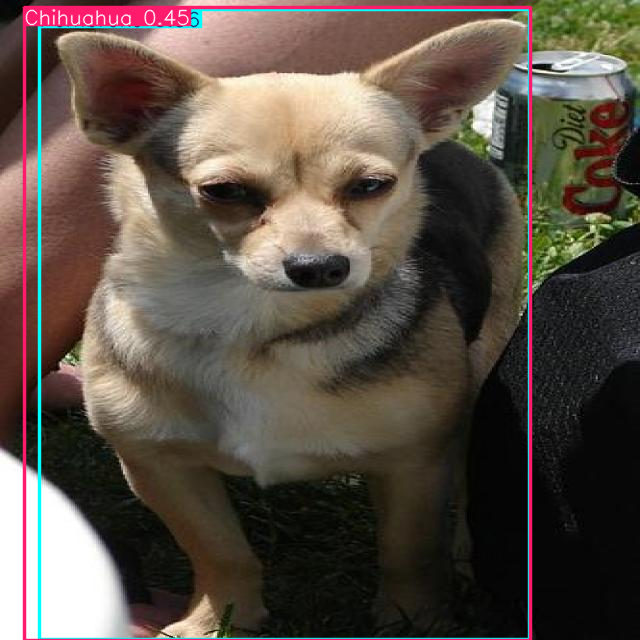


image 1/1 /content/Stanford-Dogs-Dataset-dog-breed-1/test/images/n02085620_10074_jpg.rf.a3f87a051f41dae39398a8792dcef306.jpg: 640x640 1 Chihuahua, 1 Pembroke, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Afghan_hound', 1: 'African_hunting_dog', 2: 'Airedale', 3: 'American_Staffordshire_terrier', 4: 'Appenzeller', 5: 'Australian_terrier', 6: 'Bedlington_terrier', 7: 'Bernese_mountain_dog', 8: 'Blenheim_spaniel', 9: 'Border_collie', 10: 'Border_terrier', 11: 'Boston_bull', 12: 'Bouvier_des_Flandres', 13: 'Brabancon_griffon', 14: 'Brittany_spaniel', 15: 'Cardigan', 16: 'Chesapeake_Bay_retriever', 17: 'Chihuahua', 18: 'Dandie_Dinmont', 19: 'Doberman', 20: 'English_foxhound', 21: 'English_setter', 22: 'English_springer', 23: 'EntleBucher', 24: 'Eskimo_dog', 25: 'French_bulldog', 26: 'German_shepherd', 27: 'German_short-haired_pointer', 28: 'Gordon_setter', 29: 'Great_Dane', 30: 'Great_Pyrenees', 31: 'Greater_Swiss_Mountain_dog', 32: 'Ibizan_hound', 33: 'Irish_setter', 34: 'Irish_terrier', 35: 'Irish_water_spaniel', 36: 'Irish_wolfhound', 37

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load the fine tuned model

# Predict with the model
results = model("/content/Stanford-Dogs-Dataset-dog-breed-1/test/images/n02085620_10074_jpg.rf.a3f87a051f41dae39398a8792dcef306.jpg")  # predict on an image

# Print results
results

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

#### OR

# Run inference on dog image with arguments, change arguments if needed
model.predict("/content/Stanford-Dogs-Dataset-dog-breed-1/test/images/n02085620_10074_jpg.rf.a3f87a051f41dae39398a8792dcef306.jpg", save=True, imgsz=640, conf=0.3)

In [9]:
import os

# Define the source path
source_file = "/content/runs/detect/train/weights/best.pt"

# Check if the source file exists
if os.path.exists(source_file):
    print(f"Source file '{source_file}' exists.")
else:
    print(f"Source file '{source_file}' does NOT exist. Please check the path.")


Source file '/content/runs/detect/train/weights/best.pt' exists.


In [10]:
import os

# Define the source path
source_file = "/content/runs/detect/train/weights/best.pt"

# Define the destination directory in Google Drive
destination_dir = "/content/drive/MyDrive/internship/dog_breed_yolo_roboflow_stanford"

# Define the destination file path
destination_file = os.path.join(destination_dir, "best.pt")


In [11]:
### Permanently saves the best.pt model to mydrive

import shutil

# Define the source of best.pt model
source_file = "/content/runs/detect/train/weights/best.pt"

# Define the destination to save above fine tuned model
destination_dir = "/content/drive/MyDrive/internship/dog_breed_yolo_roboflow_stanford"

destination_file = os.path.join(destination_dir, "best.pt")

# Check if the source file exists
if os.path.exists(source_file):
    # Copy the file
    shutil.copy(source_file, destination_file)
    print(f"'best.pt' has been successfully copied to '{destination_dir}'.")
else:
    print(f"Source file '{source_file}' does not exist. Please check the path.")


'best.pt' has been successfully copied to '/content/drive/MyDrive/internship/dog_breed_yolo_roboflow_stanford'.


In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [14]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [15]:
# First run the code to get the validation metrics of best.pt

from ultralytics import YOLO

model_path = "/content/runs/detect/train/weights/best.pt"  # your trained model
data_yaml_path = "/content/Stanford-Dogs-Dataset-dog-breed-1/data.yaml"  # dataset configuration file

model = YOLO(model_path)
metrics = model.val(data=data_yaml_path)  # ensure data.yaml points to the correct valid set

# Extract overall metrics
overall_precision = metrics.box.mp       # mean precision over all classes
overall_recall = metrics.box.mr          # mean recall over all classes
overall_map50 = metrics.box.map50        # mean AP at IoU=0.5 over all classes
overall_map = metrics.box.map            # mean AP at IoU=0.5:0.95 over all classes
overall_map75 = metrics.box.map75        # mean AP at IoU=0.75 over all classes

# Extract per-class metrics
class_names = model.names  # or load from data.yaml if needed, same as model.names
class_metrics = []
for i, cname in enumerate(class_names):
    p, r, ap50, ap = metrics.box.class_result(i)
    class_metrics.append((cname, p, r, ap50, ap))

print("Overall Metrics:")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"mAP50: {overall_map50}")
print(f"mAP50-95: {overall_map}")
print(f"mAP75: {overall_map75}")
print("\nPer-Class Metrics:")
for (cname, p, r, ap50, ap) in class_metrics:
    print(f"{cname}: Precision={p}, Recall={r}, mAP50={ap50}, mAP50-95={ap}")


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,653,648 parameters, 0 gradients, 6.7 GFLOPs


val: Scanning /content/Stanford-Dogs-Dataset-dog-breed-1/valid/labels.cache... 3086 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3086/3086 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 193/193 [00:24<00:00,  7.82it/s]


                   all       3086       3328      0.771       0.74      0.809      0.718
          Afghan_hound         38         54       0.95      0.926      0.976      0.876
   African_hunting_dog         27         34      0.913      0.794      0.896      0.755
              Airedale         30         32      0.737       0.79      0.881      0.821
American_Staffordshire_terrier         18         18      0.459        0.5      0.462      0.421
           Appenzeller         17         20      0.618       0.55      0.606      0.512
    Australian_terrier         28         29      0.571      0.552      0.608      0.548
    Bedlington_terrier         24         26      0.717      0.808      0.828      0.717
  Bernese_mountain_dog         42         44      0.916      0.932      0.965      0.882
      Blenheim_spaniel         28         29      0.991      0.897      0.962       0.88
         Border_collie         26         27      0.734      0.614      0.751      0.678
        Borde

In [16]:
############## Use below for production with manual metrics input from above

# Partha Pratim Ray

import os
import cv2
import numpy as np
from ultralytics import YOLO
from PIL import Image
import gradio as gr
import pandas as pd
import yaml

# ---------------------
# Configuration
# ---------------------

# Paths
model_path = "best.pt"       # Ensure the best.pt is in the local directory or provide full path
data_yaml_path = "data.yaml"  # Ensure data.yaml is in the local directory or provide full path

# Check if required files exist
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}.")
if not os.path.exists(data_yaml_path):
    raise FileNotFoundError(f"data.yaml not found at {data_yaml_path}.")

# Load the YOLO model
model = YOLO(model_path)

# Load class names from data.yaml
with open(data_yaml_path, 'r') as stream:
    data_dict = yaml.safe_load(stream)
class_names = data_dict['names']  # e.g., ['Afghan_hound', 'African_hunting_dog', ...] up to 120 classes

# ---------------------
# Metrics Data
# ---------------------

# Overall Metrics
overall_metrics = {
    "Class": "Overall",
    "Precision": 0.7710520455384078,
    "Recall": 0.7396299270284923,
    "mAP50": 0.8090336605148044,
    "mAP50-95": 0.7178123217082027,
    "mAP75": 0.777247420215978
}

# Per-Class Metrics as a multi-line string
per_class_metrics_str = """
0: Precision=0.950051944721634, Recall=0.9259259259259259, mAP50=0.9755763198757764, mAP50-95=0.8761168602246491
1: Precision=0.913220142622241, Recall=0.7941176470588235, mAP50=0.8960616051262742, mAP50-95=0.7549103010429146
2: Precision=0.7372984951890349, Recall=0.7895319766491371, mAP50=0.8814292455141511, mAP50-95=0.8206840991617665
3: Precision=0.4590719866278696, Recall=0.5, mAP50=0.461591956701709, mAP50-95=0.4211189219475949
4: Precision=0.6184005433721002, Recall=0.55, mAP50=0.606004146196315, mAP50-95=0.512222940400535
5: Precision=0.5713923109334266, Recall=0.5516453651312371, mAP50=0.6077089403423442, mAP50-95=0.5480459050646989
6: Precision=0.7171550800348669, Recall=0.8076923076923077, mAP50=0.8277810374576291, mAP50-95=0.716992210820697
7: Precision=0.9159120375114393, Recall=0.9318181818181818, mAP50=0.9646808976669168, mAP50-95=0.8816416588132834
8: Precision=0.9913887843872787, Recall=0.896551724137931, mAP50=0.9622860780984719, mAP50-95=0.87970008325344
9: Precision=0.7340852070508719, Recall=0.613871078813217, mAP50=0.7510088541708057, mAP50-95=0.6775157428360266
10: Precision=0.8420572532183483, Recall=0.9642857142857143, mAP50=0.9420676470588236, mAP50-95=0.8492293322429207
11: Precision=0.7099820948850775, Recall=0.8611111111111112, mAP50=0.8270923840557883, mAP50-95=0.7008903529428722
12: Precision=0.8634064755508549, Recall=0.7901915514513194, mAP50=0.9023652651696131, mAP50-95=0.8518173491764902
13: Precision=0.9299135123785923, Recall=0.8947368421052632, mAP50=0.9382840909090909, mAP50-95=0.8506474227923493
14: Precision=0.8306860735970896, Recall=0.7619047619047619, mAP50=0.8547228953537712, mAP50-95=0.7928691056143748
15: Precision=0.7551169289450425, Recall=0.6429092513076484, mAP50=0.7430199755151243, mAP50-95=0.6916089837167693
16: Precision=0.7799482742887337, Recall=0.886157931584948, mAP50=0.8752104461316781, mAP50-95=0.7687241130428973
17: Precision=0.8575207045294126, Recall=0.42857142857142855, mAP50=0.7140262820249389, mAP50-95=0.6183897172277056
18: Precision=0.8716010553696922, Recall=0.7037037037037037, mAP50=0.8307099280692011, mAP50-95=0.7576428475073667
19: Precision=0.7631703486659736, Recall=0.71875, mAP50=0.8517840363359761, mAP50-95=0.7270017216968
20: Precision=0.7006786499565775, Recall=0.5357142857142857, mAP50=0.681074868661097, mAP50-95=0.6043264313001361
21: Precision=0.879003331472376, Recall=0.7727272727272727, mAP50=0.8806168979931869, mAP50-95=0.7667080346058525
22: Precision=0.7399740934714494, Recall=0.9473684210526315, mAP50=0.8270595091183327, mAP50-95=0.7297418045330895
23: Precision=0.6797523465134718, Recall=0.6634822741917626, mAP50=0.7290151202431302, mAP50-95=0.6389816563450246
24: Precision=0.5106575767372992, Recall=0.2692307692307692, mAP50=0.4628142655915253, mAP50-95=0.4259814227175367
25: Precision=0.7178351457649109, Recall=0.6363877593290892, mAP50=0.7636380572293818, mAP50-95=0.703198583575968
26: Precision=0.7683054771818867, Recall=0.76, mAP50=0.8446857768667896, mAP50-95=0.785944137555996
27: Precision=0.9118273620472525, Recall=0.9411764705882353, mAP50=0.9854761904761906, mAP50-95=0.9027474156118146
28: Precision=0.9397295768801787, Recall=0.9, mAP50=0.9599586372531578, mAP50-95=0.8124781140856718
29: Precision=0.5533603918415103, Recall=0.4850790559103108, mAP50=0.6570443199470123, mAP50-95=0.5567443986552293
30: Precision=0.7277265819014959, Recall=0.6341463414634146, mAP50=0.7712519423559233, mAP50-95=0.6501650478097549
31: Precision=0.9026604718725301, Recall=0.6956186570121078, mAP50=0.8680566835689678, mAP50-95=0.6978489639647801
32: Precision=0.8135026607058359, Recall=0.7522680538999782, mAP50=0.8354574758576219, mAP50-95=0.7821063558458735
33: Precision=0.7790779039480513, Recall=0.9, mAP50=0.8962941688074686, mAP50-95=0.804624933068968
34: Precision=0.6679276293654098, Recall=0.8, mAP50=0.7718791094285562, mAP50-95=0.6901626796134892
35: Precision=0.7498106300805424, Recall=1.0, mAP50=0.9288888888888888, mAP50-95=0.8281384745931912
36: Precision=0.669169980455674, Recall=0.6363636363636364, mAP50=0.7484207820518326, mAP50-95=0.6197496206486401
37: Precision=0.6608559782633446, Recall=0.47073650675174755, mAP50=0.7066760114303333, mAP50-95=0.5642940639926054
38: Precision=0.8076999229108593, Recall=0.891152802239241, mAP50=0.8391059986380347, mAP50-95=0.7108548810513233
39: Precision=0.7968481463986551, Recall=0.85, mAP50=0.9042326007326007, mAP50-95=0.8318236263736264
40: Precision=0.8023103515088807, Recall=0.8776654610627173, mAP50=0.896700952322643, mAP50-95=0.8317242069728058
41: Precision=0.5921871873135267, Recall=0.6129032258064516, mAP50=0.6671298280474146, mAP50-95=0.6157299090903454
42: Precision=0.9252749675177708, Recall=1.0, mAP50=0.995, mAP50-95=0.8966156368778817
43: Precision=0.6805277669157428, Recall=0.5992657872763302, mAP50=0.6030014064050425, mAP50-95=0.5489571828955201
44: Precision=0.8494201308178745, Recall=0.8585289528827474, mAP50=0.9241694421237407, mAP50-95=0.8100875509127746
45: Precision=0.7024809793928225, Recall=0.7874260309720877, mAP50=0.8845747233909929, mAP50-95=0.7949268449653824
46: Precision=0.7025574866255323, Recall=0.76, mAP50=0.8325492141035347, mAP50-95=0.666734865195336
47: Precision=0.7591941149453945, Recall=0.5912316092043576, mAP50=0.7512858105633272, mAP50-95=0.6764176572398436
48: Precision=0.8456657996345192, Recall=0.8430628848647751, mAP50=0.9399850452197447, mAP50-95=0.8786812002629617
49: Precision=0.7204710725917737, Recall=0.7352941176470589, mAP50=0.741237399809586, mAP50-95=0.6761715420054211
50: Precision=0.8253276396888147, Recall=0.8928571428571429, mAP50=0.906570616883117, mAP50-95=0.8174792122718552
51: Precision=0.8960256069175631, Recall=0.7368421052631579, mAP50=0.8653566969859104, mAP50-95=0.7222711865850817
52: Precision=0.8965837951145418, Recall=0.9642857142857143, mAP50=0.967472340425532, mAP50-95=0.8589636557920141
53: Precision=0.9545083115556321, Recall=0.8571428571428571, mAP50=0.9135674652406416, mAP50-95=0.8215518853555006
54: Precision=0.5646648682359179, Recall=0.44, mAP50=0.5619231870105881, mAP50-95=0.4908901394556514
55: Precision=0.7872131727479629, Recall=0.9254203918719266, mAP50=0.8099451754385967, mAP50-95=0.7379299742891713
56: Precision=0.9144822017339415, Recall=0.9583333333333334, mAP50=0.9758695652173913, mAP50-95=0.9004608041843742
57: Precision=0.7574007279689324, Recall=0.8147857737779668, mAP50=0.874966859820315, mAP50-95=0.8177803359690431
58: Precision=0.7840435303646889, Recall=0.9310344827586207, mAP50=0.9344552352166162, mAP50-95=0.8622790610302784
59: Precision=0.7905591604614023, Recall=0.9090909090909091, mAP50=0.9071769202766654, mAP50-95=0.8498133648608812
60: Precision=0.6393577679658906, Recall=0.71875, mAP50=0.7464381385789797, mAP50-95=0.7028502401944823
61: Precision=0.9636942143168822, Recall=0.926829268292683, mAP50=0.9690184704275709, mAP50-95=0.8587403761587502
62: Precision=0.7106422187027044, Recall=0.7372477654594655, mAP50=0.811168030248403, mAP50-95=0.6946423381867156
63: Precision=0.6240267051567073, Recall=0.7419354838709677, mAP50=0.6856916079641516, mAP50-95=0.5598098005606787
64: Precision=0.5708113423650005, Recall=0.4, mAP50=0.5670697751464068, mAP50-95=0.4623254566524631
65: Precision=0.712308984376764, Recall=0.6818181818181818, mAP50=0.6822830260727701, mAP50-95=0.6207656181810598
66: Precision=0.9281391491434923, Recall=0.9259259259259259, mAP50=0.9771428571428571, mAP50-95=0.9193733014191849
67: Precision=0.7822224074931787, Recall=0.8164048926504403, mAP50=0.9250230341178616, mAP50-95=0.8312403244806166
68: Precision=0.7407527943592982, Recall=0.5681818181818182, mAP50=0.7576132015540581, mAP50-95=0.6539397100680419
69: Precision=0.658344258202623, Recall=0.5238095238095238, mAP50=0.6335207628321592, mAP50-95=0.5049619631877108
70: Precision=0.8231282250313716, Recall=0.96, mAP50=0.9436381749870592, mAP50-95=0.8243550313423704
71: Precision=0.7804906787812523, Recall=0.7359250181530276, mAP50=0.8436523291064535, mAP50-95=0.7293180250825338
72: Precision=0.7636938036158667, Recall=0.8571428571428571, mAP50=0.9038575262456839, mAP50-95=0.8255486611843585
73: Precision=0.7210597817728865, Recall=0.7, mAP50=0.747461695975865, mAP50-95=0.6554385227231857
74: Precision=0.8373838694891609, Recall=0.7925992470528516, mAP50=0.8964220894115631, mAP50-95=0.7998322000142604
75: Precision=0.6948102089833058, Recall=0.6282619254581066, mAP50=0.7272340541915377, mAP50-95=0.6055805877651762
76: Precision=0.8140855787046279, Recall=0.8, mAP50=0.8444618372423327, mAP50-95=0.6635431207567797
77: Precision=0.7694040466984147, Recall=0.6451612903225806, mAP50=0.8016044789081129, mAP50-95=0.7220811021287906
78: Precision=0.822004684194274, Recall=0.8553170634500037, mAP50=0.9001247244440818, mAP50-95=0.8446800734714162
79: Precision=0.8756831442439423, Recall=0.7288492706478783, mAP50=0.8527018889105804, mAP50-95=0.7948548317962955
80: Precision=0.9559447197223753, Recall=0.7236009393173949, mAP50=0.885492314226582, mAP50-95=0.8071829181758705
81: Precision=0.8578978417079882, Recall=0.8695652173913043, mAP50=0.9292433783108446, mAP50-95=0.869065290805738
82: Precision=0.940395346893057, Recall=0.5262511451637173, mAP50=0.8308674837523942, mAP50-95=0.713777575976463
83: Precision=0.5062456909760218, Recall=0.42857142857142855, mAP50=0.5831563152337651, mAP50-95=0.5284580407093069
84: Precision=0.7821500223465658, Recall=0.8461538461538461, mAP50=0.8896114018712242, mAP50-95=0.7632809864880561
85: Precision=0.8570093036531184, Recall=0.768415750498518, mAP50=0.8641878940891257, mAP50-95=0.7345890173170971
86: Precision=0.9336806482609095, Recall=0.8533788315552395, mAP50=0.9293629662486024, mAP50-95=0.8249410235935531
87: Precision=0.9345734419563879, Recall=0.84, mAP50=0.8993961136902314, mAP50-95=0.751260995580089
88: Precision=0.8253700344920221, Recall=0.6785714285714286, mAP50=0.7737868128717942, mAP50-95=0.6945037476840215
89: Precision=0.5591822015168044, Recall=0.40816081205181687, mAP50=0.5186574574038987, mAP50-95=0.3913971952114973
90: Precision=0.8162174621443528, Recall=0.8078689489851244, mAP50=0.9182480184871491, mAP50-95=0.8416554549009767
91: Precision=0.8074441943237106, Recall=0.7857142857142857, mAP50=0.883115072856214, mAP50-95=0.7708640311640476
92: Precision=0.8762454169520998, Recall=0.8125, mAP50=0.8436440648483553, mAP50-95=0.8085127428001734
93: Precision=0.7744758889653982, Recall=0.68, mAP50=0.8269884444312363, mAP50-95=0.6915551946760756
94: Precision=0.711088127413241, Recall=0.6857142857142857, mAP50=0.7831013411889166, mAP50-95=0.7180543483756786
95: Precision=0.7906170853084622, Recall=0.8262159362325655, mAP50=0.8480347086698847, mAP50-95=0.7374124386653089
96: Precision=0.831835967000895, Recall=0.9333333333333333, mAP50=0.9323333333333333, mAP50-95=0.9043257561980965
97: Precision=0.9837569186329179, Recall=0.9642857142857143, mAP50=0.9768309859154928, mAP50-95=0.8283180424900264
98: Precision=0.7417411361822507, Recall=0.6391371206075025, mAP50=0.7498195995357477, mAP50-95=0.70808938406264
99: Precision=0.9904679353245135, Recall=0.8846153846153846, mAP50=0.9028627166719194, mAP50-95=0.752072056680778
100: Precision=0.8317414830228937, Recall=0.75, mAP50=0.7459513869872813, mAP50-95=0.6926176615354661
101: Precision=0.41978680894089854, Recall=0.4782608695652174, mAP50=0.48141022360551583, mAP50-95=0.4144050706681329
102: Precision=0.6446827675977833, Recall=0.7619047619047619, mAP50=0.8253548103548103, mAP50-95=0.7289570241595414
103: Precision=0.771803414775816, Recall=0.7958540537409124, mAP50=0.8893964079800443, mAP50-95=0.8319058711090973
104: Precision=0.46852444226198303, Recall=0.44097931046456407, mAP50=0.39952897726462094, mAP50-95=0.3147688996209689
105: Precision=0.6631411027359093, Recall=0.5106839320057245, mAP50=0.6733223280489881, mAP50-95=0.5746738298302899
106: Precision=1.0, Recall=0.6651217326058613, mAP50=0.7984452522197043, mAP50-95=0.6863382402967833
107: Precision=0.8327070961152427, Recall=0.96, mAP50=0.9694927536231884, mAP50-95=0.8618759209987303
108: Precision=0.8126512912365189, Recall=0.7992019378892692, mAP50=0.8333851819016381, mAP50-95=0.7120968967901217
109: Precision=0.5905790605724864, Recall=0.5501193036758621, mAP50=0.6811595925297115, mAP50-95=0.5671807467011729
110: Precision=0.8607857169580835, Recall=0.8421052631578947, mAP50=0.8541075996374958, mAP50-95=0.7472136130583998
111: Precision=0.7602089400199521, Recall=0.5769230769230769, mAP50=0.7627324274723889, mAP50-95=0.6905122694487801
112: Precision=0.7889751824977789, Recall=0.7692307692307693, mAP50=0.7564113973353781, mAP50-95=0.6488640540762379
113: Precision=0.6494792910272318, Recall=0.43239109804927656, mAP50=0.6031385443937921, mAP50-95=0.5494966164345454
114: Precision=0.5877517671416174, Recall=0.5, mAP50=0.5915767929438827, mAP50-95=0.498830414109515
115: Precision=0.6011481453277376, Recall=0.7894736842105263, mAP50=0.7358054903166529, mAP50-95=0.6513141815274721
116: Precision=0.8737558428352519, Recall=0.64, mAP50=0.7586255320667661, mAP50-95=0.7208942608628005
117: Precision=0.6146246520159415, Recall=0.6818181818181818, mAP50=0.7404198709608547, mAP50-95=0.6515161494565639
118: Precision=0.6601156119013557, Recall=0.6475174296603731, mAP50=0.6695776738813121, mAP50-95=0.5734412428124116
119: Precision=0.8467176165515974, Recall=0.8076923076923077, mAP50=0.90133166969147, mAP50-95=0.8275215828900926
"""

# Function to parse per-class metrics from the multi-line string
def parse_per_class_metrics(metrics_str):
    per_class_metrics = []
    lines = metrics_str.strip().split('\n')
    for line in lines:
        if not line.strip():
            continue  # Skip empty lines
        # Split by colon to separate class index and metrics
        try:
            class_idx_part, metrics_part = line.split(':', 1)
            class_idx = int(class_idx_part.strip())
            # Extract metrics using split and strip
            metrics = {}
            metrics["Class Index"] = class_idx
            metrics_list = metrics_part.strip().split(', ')
            for metric in metrics_list:
                key, value = metric.split('=')
                key = key.strip()
                value = float(value.strip())
                metrics[key] = value
            per_class_metrics.append(metrics)
        except Exception as e:
            print(f"Error parsing line: {line}")
            print(e)
    return per_class_metrics

# Parse the per-class metrics
parsed_per_class_metrics = parse_per_class_metrics(per_class_metrics_str)

# Map class indices to class names
per_class_metrics_data = []
for metric in parsed_per_class_metrics:
    class_idx = metric.pop("Class Index")
    class_name = class_names[class_idx] if class_idx < len(class_names) else f"Class{class_idx}"
    metric["Class"] = class_name
    per_class_metrics_data.append(metric)

# Combine Overall Metrics and Per-Class Metrics
metrics_data = [overall_metrics] + per_class_metrics_data

# Create Metrics DataFrame
metrics_df = pd.DataFrame(metrics_data, columns=["Class", "Precision", "Recall", "mAP50", "mAP50-95"])

# ---------------------
# Inference Functions
# ---------------------

def run_inference(img: np.ndarray, model):
    """
    Runs inference on the input image using the YOLO model.
    Returns the detection results and the annotated image.
    """
    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run prediction with specified confidence and IoU thresholds
    results = model.predict(img_rgb, conf=0.25, iou=0.6)

    detections = []
    res = results[0]
    boxes = res.boxes
    if boxes is not None and len(boxes) > 0:
        for i in range(len(boxes)):
            xyxy = boxes.xyxy[i].tolist()  # Bounding box coordinates
            conf = float(boxes.conf[i])     # Confidence score
            cls_idx = int(boxes.cls[i])     # Class index
            class_name = class_names[cls_idx]  # Class name
            detections.append([class_name, conf, *xyxy])
    return detections, results

def draw_boxes(image: np.ndarray, detections):
    """
    Draws bounding boxes and labels on the image.
    """
    # Define a color palette for classes (BGR)
    palette = [
        (0, 255, 0),    # Green
        (255, 0, 0),    # Blue
        (0, 0, 255),    # Red
        (255, 255, 0),  # Cyan
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Yellow
        (128, 0, 128),  # Purple
        (128, 128, 0),  # Olive
        (0, 128, 128),  # Teal
        # Add more colors as needed
    ]
    num_colors = len(palette)

    for det in detections:
        class_name, conf, x1, y1, x2, y2 = det
        # Find class index
        try:
            cls_idx = class_names.index(class_name)
        except ValueError:
            cls_idx = 0  # Default to first color if class not found
        color = palette[cls_idx % num_colors]

        # Draw bounding box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

        # Prepare label
        label = f"{class_name} {conf:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        thickness = 2

        # Get text size
        (tw, th), _ = cv2.getTextSize(label, font, font_scale, thickness)

        # Draw filled rectangle behind text
        cv2.rectangle(image, (int(x1), int(y1)-th-10), (int(x1)+tw, int(y1)), color, -1)

        # Put text above the bounding box
        cv2.putText(image, label, (int(x1), int(y1)-5), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    return image

def process_image(image):
    """
    Processes the input image, runs inference, and prepares the outputs.
    """
    # Convert PIL Image to NumPy array
    img = np.array(image)

    # Convert from RGB to BGR for OpenCV
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Run classification inference
    detections, results = run_inference(img_bgr, model)

    # Draw bounding boxes on the image
    annotated_img = draw_boxes(img_bgr.copy(), detections)

    # Convert annotated image back to RGB
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Convert to PIL Image
    annotated_img_pil = Image.fromarray(annotated_img_rgb)

    # Create Detection Results DataFrame
    det_df = pd.DataFrame(detections, columns=["Class", "Confidence", "x1", "y1", "x2", "y2"])

    # Return annotated image, detection results, and metrics table
    return annotated_img_pil, det_df, metrics_df

# ---------------------
# Gradio Interface
# ---------------------

with gr.Blocks() as demo:
    gr.Markdown("# YOLO Dog Breed Detection Web App")
    gr.Markdown("Upload an image of a dog, and the model will detect and classify the breed, displaying bounding boxes, confidence scores, and precomputed validation metrics.")

    with gr.Row():
        with gr.Column():
            input_image = gr.Image(type="pil", label="Upload Image")
            submit_btn = gr.Button("Run Inference")
        with gr.Column():
            annotated_image = gr.Image(type="pil", label="Annotated Image")
            det_results = gr.DataFrame(label="Detection Results")
            metrics_table = gr.DataFrame(value=metrics_df, label="Validation Metrics")

    submit_btn.click(fn=process_image, inputs=input_image, outputs=[annotated_image, det_results, metrics_table])

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://23eacb2c1ec54cf498.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
